In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as pyplot

In [10]:
df = pd.read_csv('camera_dataset.csv')
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [11]:
df['Release date'].value_counts()

2007    163
2006    153
2005    143
2004    141
2003    101
2002     89
2001     85
2000     61
1999     53
1998     32
1997     11
1996      4
1995      1
1994      1
Name: Release date, dtype: int64

In [13]:
df['Effective pixels'].value_counts()


3.0     197
1.0     152
6.0     119
7.0     115
5.0     114
4.0     101
8.0      86
2.0      50
10.0     39
12.0     18
9.0       6
13.0      3
21.0      1
16.0      1
11.0      1
Name: Effective pixels, dtype: int64

In [15]:
df['Normal focus range'].value_counts()

50.0     277
60.0     152
0.0      135
80.0     105
30.0      97
40.0      88
10.0      23
70.0      20
20.0      14
45.0      11
25.0      10
90.0       9
55.0       8
47.0       6
35.0       6
46.0       6
76.0       6
75.0       4
4.0        4
24.0       4
57.0       3
12.0       2
8.0        2
85.0       2
100.0      2
34.0       1
66.0       1
32.0       1
19.0       1
120.0      1
23.0       1
1.0        1
Name: Normal focus range, dtype: int64

In [16]:
df['Storage included'].value_counts()

16.0     278
8.0      146
32.0     143
0.0      123
4.0       26
10.0      25
14.0      21
11.0      18
12.0      18
20.0      18
9.0       17
13.0      15
27.0      13
1.0       12
22.0      12
26.0      11
31.0       9
24.0       8
23.0       8
19.0       7
6.0        7
64.0       7
28.0       6
21.0       5
2.0        4
58.0       4
45.0       4
18.0       3
7.0        3
56.0       3
15.0       3
47.0       3
25.0       3
52.0       3
54.0       3
17.0       2
48.0       2
450.0      2
256.0      2
340.0      1
128.0      1
50.0       1
173.0      1
Name: Storage included, dtype: int64

In [17]:
df["Weight (inc. batteries)"].value_counts()

180.0    33
190.0    32
320.0    29
250.0    28
165.0    27
         ..
650.0     1
930.0     1
735.0     1
585.0     1
469.0     1
Name: Weight (inc. batteries), Length: 236, dtype: int64

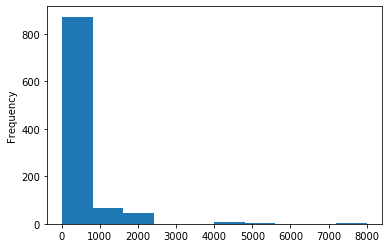

In [38]:
df["Price"].plot.hist(bins=10)
#most camera prices are between 0 and 1000

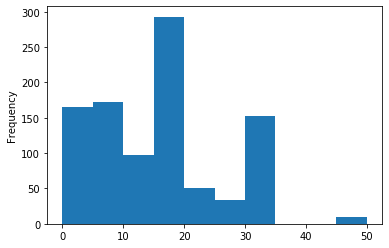

In [29]:
df['Storage included'].plot.hist(bins=10,range=[0, 50])

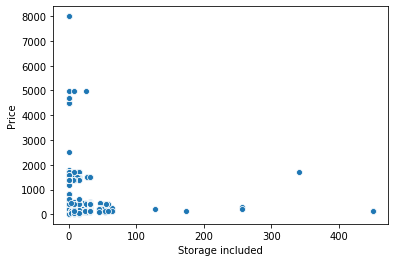

In [33]:
sns.scatterplot(x="Storage included", y="Price", data = df)
#drop storage included because it doesnt have a direct correlation with the price even though it should.

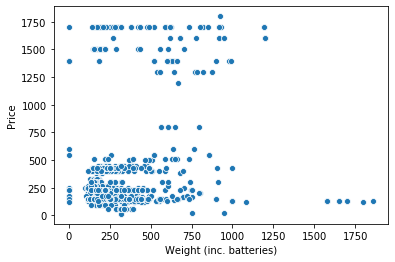

In [44]:
sns.scatterplot(x="Weight (inc. batteries)", y="Price", data = df)
#weight increases the price from 500-1000. price>=2000 are all outliers. weight >=1500 are outliers.
df = df[df["Weight (inc. batteries)"] < 1500]

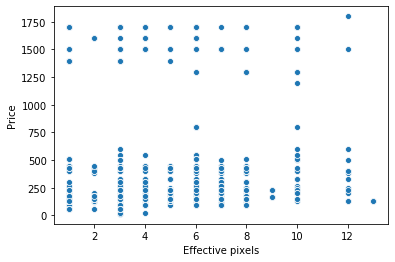

In [45]:
sns.scatterplot(x="Effective pixels", y="Price", data = df)
#the higher ranking or the more effective pixels there are then the prices can sometimes increase so this is definitely an important feature.

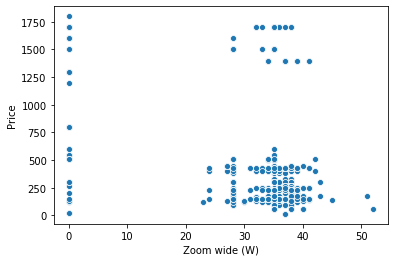

In [46]:
sns.scatterplot(x="Zoom wide (W)", y="Price", data = df)

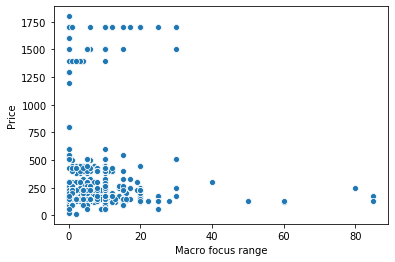

In [47]:
sns.scatterplot(x="Macro focus range", y="Price", data = df)
#after observing the macro focus range, it has no effect on the price of the camera. 

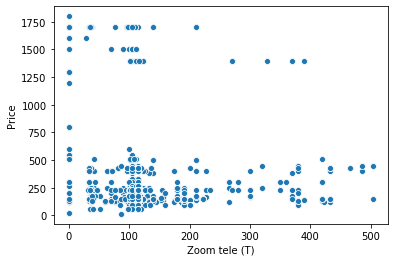

In [48]:
sns.scatterplot(x="Zoom tele (T)", y="Price", data = df)

In [49]:
#for cameras above the price of 2100,  are all outliers and have 0 as their values for multiple features which can
#cause a problem

In [51]:
df = df[df['Price'] <= 2100]
df.shape

(975, 13)

In [54]:
df.drop(['Model', 'Release date', 'Storage included'],axis=1, inplace=True)


KeyError: "['Model' 'Release date' 'Storage included'] not found in axis"

In [55]:
df.shape

(975, 10)

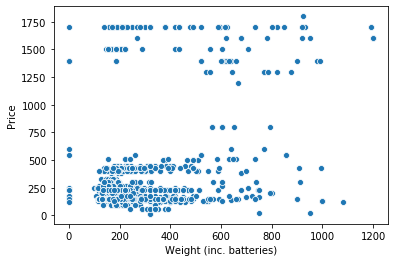

In [56]:

sns.scatterplot(x="Weight (inc. batteries)", y="Price", data = df)


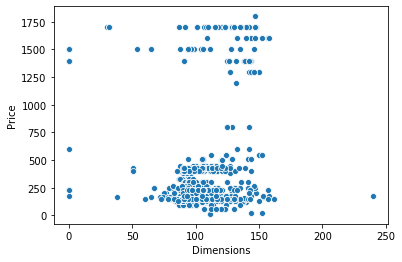

In [57]:
sns.scatterplot(x="Dimensions", y="Price", data = df)

In [58]:
X = df.drop("Price",axis=1)
Y = df["Price"]

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=0)

In [61]:
reg = LinearRegression()
reg.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
reg.score(test_features,test_labels)

0.2245409858937284

In [63]:
reg.coef_

array([ -0.15227642,   0.10581801,  -1.13133935, -14.85711214,
        -0.60145625,   0.36991151,   1.70418854,   0.64474522,
        -3.08223662])

In [64]:
#try gridsearch cv to improve, cross validation is missing, and data analysis needs a lot more work. 
#some features can definitely be ignored